# Ejercicio N1

In [47]:
from IPython.display import IFrame
IFrame("./pdf/TP2-Eje1.pdf", width=1000, height=500)

# Ejercicio N2
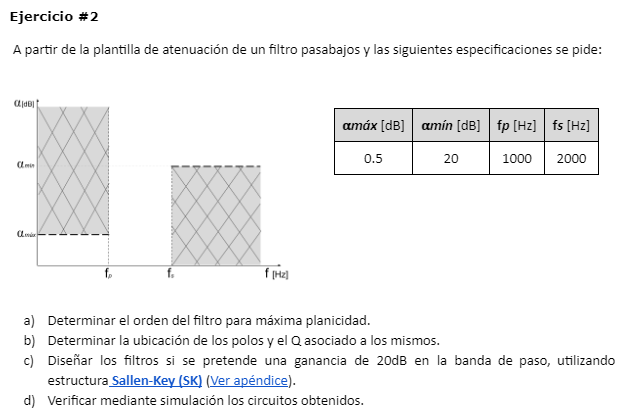

### Diseño de filtro máxima planicidad

$ \Omega_W = 1k Hz $  
$ W_0 = 1  W_s = 2 $  
$ \epsilon = \sqrt{10^{\frac{\alpha_mdB}{10}} - 1} $  
$ \epsilon = \sqrt{10^{\frac{0,5}{10}} - 1} $  
$ \epsilon = 0,349 $  
$ \epsilon^2 = 0,122 $  
$ \alpha_{mindB} = 10 \cdot log(1 + \epsilon^2 \cdot W_{s}^{2n}) $  
$ \alpha_{mindB} = 10 \cdot log(1 + 0,122 \cdot 2^{2n}) $  
$ n = 5 $  $ \alpha_{mindB} = 21 $  
$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot w^(2n)} $   


In [1]:
import numpy as np
import math

amax = 0.5
amin = 20

w0 = 1
ws = 2

ep = math.sqrt(10**(amax/10) - 1)

n = np.log((10**(amin/10) - 1)/(ep**2))/(np.log(2)*2)

print(f" epsilon = {ep}, orden = {n} ")

 epsilon = 0.34931140018894796, orden = 4.832092677374252 


### Ubicacion de polos y Q correspondientes
#### Diseño como butter
$ \Omega_{W} = W_B = \epsilon^{\frac{-1}{n}} \cdot W_p' = \epsilon^{\frac{-1}{5}} \cdot 2 \pi \cdot 2000 Hz $  
$ |T(jw))|^2 |w=\frac{s}{j} = \frac{1}{1 + \frac{s}{j}^{2 \cdot 5}} = T(s) \cdot T(-s) $  
$ |T(jw))|^2 |w=\frac{s}{j} = \frac{1}{1 - s^{10}} = T(s) \cdot T(-s) $  

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

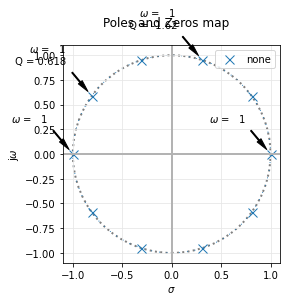

In [2]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

my_tf = TransferFunction([1],[-1,0,0,0,0,0,0,0,0,0,1])

pzmap(my_tf,2)

##### Divido en 3 transferencias, 2 de orden 2 y una de orden 1

$ Q_1 = \frac{1}{2 \cdot cos(\frac{4\pi}{5})} = 0,618 $  
$ Q_2 = \frac{1}{2 \cdot cos(\frac{3\pi}{5})} = 1,618 $   
$ T_1(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_1} + W_0^2} $  
$ T_2(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_2} + W_0^2} $  
$ T_3(s) = \frac{1}{s+1} $  
$ L_1 = Q_1   L_2 = Q_2  C_1 = \frac{1}{Q_1}  C_2 = \frac{1}{Q_2} $  

### Sallen-key
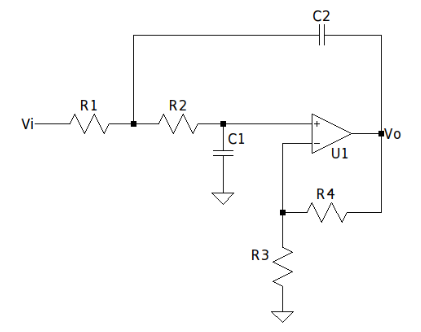
$ T_{SK}(s) = \frac{k \cdot W_0}{s^2 + s \cdot \frac{W_0}{Q} + W_0^2} $  
$ W_0^2 = \frac{1}{R_1 \cdot R_2 \cdot C^2} $  
$ K = 1 + \frac{R_4}{R_3} $  
$ Q = \frac{1}{3 - K} $  

#### Transferencia 1

$ \Omega_Z = R_1 = 1 $  
$ W_{01}^2 = \frac{1}{C^2} $  
$ C = \frac{1}{W_{01}} $  
$ W_{01} = 1 $  $ C = 1 $  
$ Q_1 = 0,618 $  
$ K_1 = 3 - \frac{1}{Q_1} $  
$ K_1 = 3 - \frac{1}{0,618} $  
$ K_1 = 1,381877 $  
$ K_1 = 1 + \frac{R_4}{R_3} $  
$ R_4 = (K_1 - 1) \cdot R_3 $  
$ R_4 = (K_1 - 1) \cdot R_3 $  
$ R_4 = 0,381877 \cdot R_3 $

#### Transferencia 2

$ \Omega_Z = R_1 = 1 $  
$ W_{02}^2 = \frac{1}{C^2} $  
$ C = \frac{1}{W_{02}} $  
$ W_{02} = 1 $  $ C = 1 $  
$ Q_2 = 1,618 $  
$ K_2 = 3 - \frac{1}{Q_2} $  
$ K_2 = 3 - \frac{1}{1,618} $  
$ K_2 = 2,381966 $  
$ K_2 = 1 + \frac{R_4}{R_3} $  
$ R_4 = (K_2 - 1) \cdot R_3 $  
$ R_4 = (K_2 - 1) \cdot R_3 $  
$ R_4 = 1,381966 \cdot R_3 $  

#### Transferencia 3
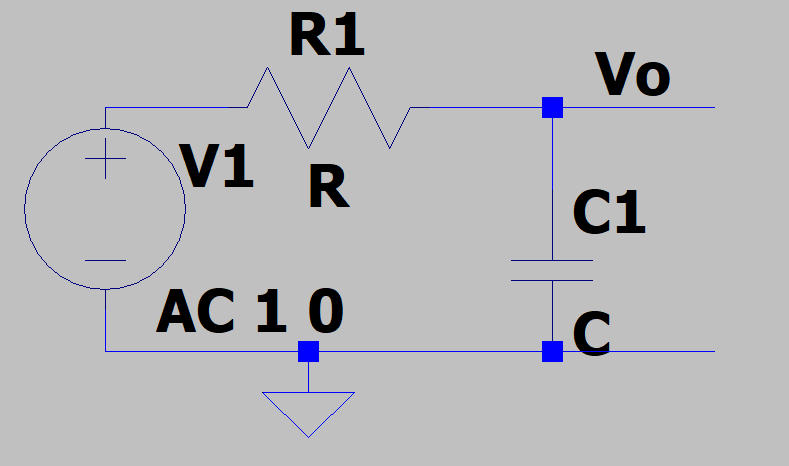
$ T_3(s) = \frac{\frac{1}{s C}}{\frac{1}{s C} + R} $  
$ T_3(s) = \frac{1}{1 + s C R} $    
$ T_3(s) = \frac{\frac{1}{RC}}{s + \frac{1}{RC}} $    
$ W_03 = 1 $  
$ \frac{1}{RC} = 1 $  
$ R = 1 $  $ C = 1 $  
$ T_3(jw)_{s = jw} = \frac{1}{1+jw} $  
$ T_3(jw)_{w = 1} = \frac{1}{1+j} = \frac{1}{\sqrt{2}} \cdot e^{-\frac{\pi}{4}} $  

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

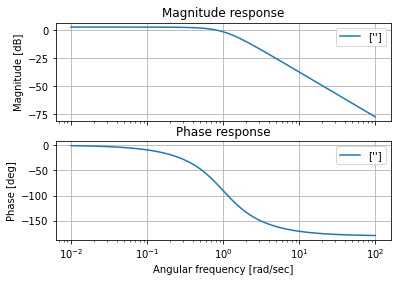

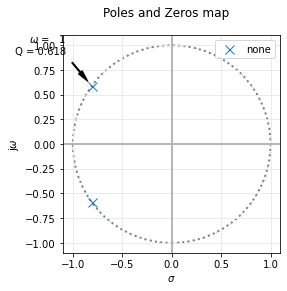

In [3]:
# Transferencia 1

W01 = 1
Q1  = 0.618
K1  = 1.381877

numerador1   = [K1 * W01**2] 
denominador1 = [1 , W01/Q1 , W01**2]

my_tf1 = TransferFunction(numerador1, denominador1)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

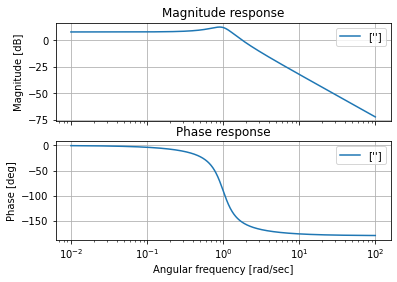

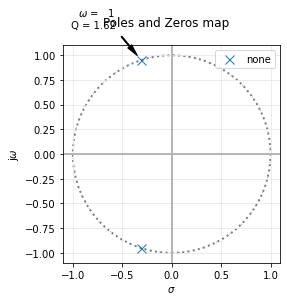

In [4]:
# Transferencia 2

W02 = 1
Q2  = 1.618
K2  = 2.381966

numerador2   = [K2 * W02**2] 
denominador2 = [1 , W02/Q2 , W02**2]

my_tf2 = TransferFunction(numerador2, denominador2)

bodePlot(my_tf2,1)

pzmap(my_tf2,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

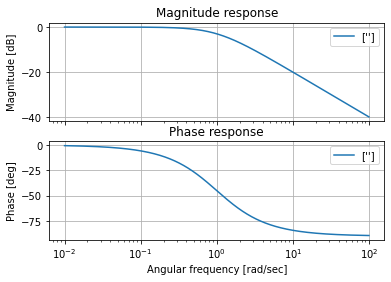

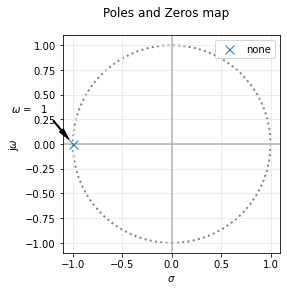

In [5]:
# Transferencia 3

W03 = 1

numerador3   = [W03**2] 
denominador3 = [1 , W03**2]

my_tf3 = TransferFunction(numerador3, denominador3)

bodePlot(my_tf3,1)

pzmap(my_tf3,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

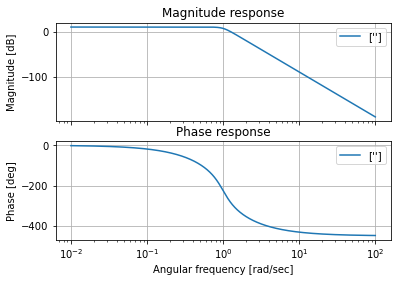

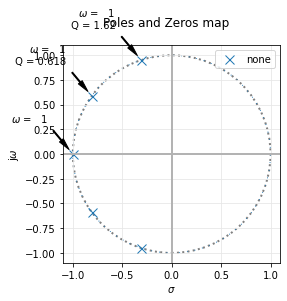

In [6]:
# Transferencia total

numerador = np.polymul(numerador1 , numerador2)
numerador = np.polymul(numerador  , numerador3)

denominador = np.polymul(denominador1 , denominador2)
denominador = np.polymul(denominador  , denominador3)

my_tf = TransferFunction(numerador, denominador)

bodePlot(my_tf,1)

pzmap(my_tf,2)

### Circuito normalizado
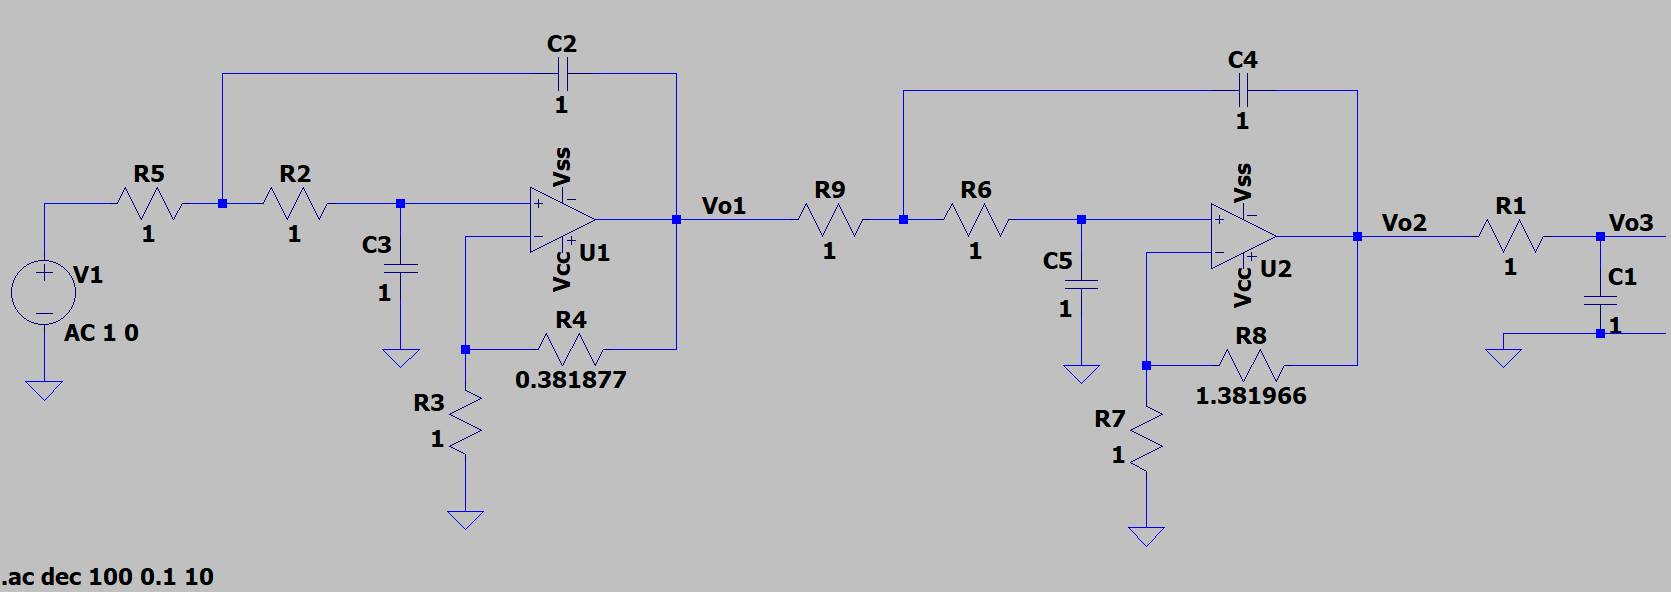

#### Desnormalizar:
$ \epsilon = 0,349 $  
$ \Omega_Z = 1k $  
$ \Omega_{W} = \epsilon^{\frac{-1}{5}} \cdot 2 \pi \cdot 1000 Hz $  
$ R_4 = \Omega_Z \cdot 0,381877 =  381,877 \Omega $  
$ R_8 = \Omega_Z \cdot 1,381966 = 1381,966 \Omega $    
$ C_1 = C_2 = C_3 = C_4 = C_5 = \frac{1}{\Omega_Z \cdot \Omega_W} = 183,492 nF $  

#### Transferencia 1

$ Q_1 = 0,618 $  
$ Q = \frac{1}{3 CR - K} $  
$ K = 3 CR - \frac{1}{Q} $  
$ K_1 = 3 CR - \frac{1}{Q_1} $  
$ K_1 = 3 1k \cdot 183,492 nF - \frac{1}{0,618} $  
$ K_1 = 1,6176 $  

$ Q_2 = 1,618 $  
$ Q = \frac{1}{3 CR - K} $  
$ K = 3 CR - \frac{1}{Q} $  
$ K_2 = 3 CR - \frac{1}{Q_2} $  
$ K_2 = 3 1k \cdot 183,492 nF - \frac{1}{1,618} $  
$ K_2 = 0,6179 $  

$ K_2 = 2 \cdot K_{divisor} $  
$  K_{divisor} = \frac{K_2}{2} $  
$  K_{divisor} = \frac{0,6179}{2} = 0,30895 $  
$ C \cdot K_{divisor} =  183,492 nF \cdot 0,30895 = 56,38 nF $  
$ C \cdot (1-K_{divisor}) =  183,492 nF \cdot (1-0,30895) = 126,8 nF $  

$ 20 dB -> 10 $ de ganancia, agrego un no inversor
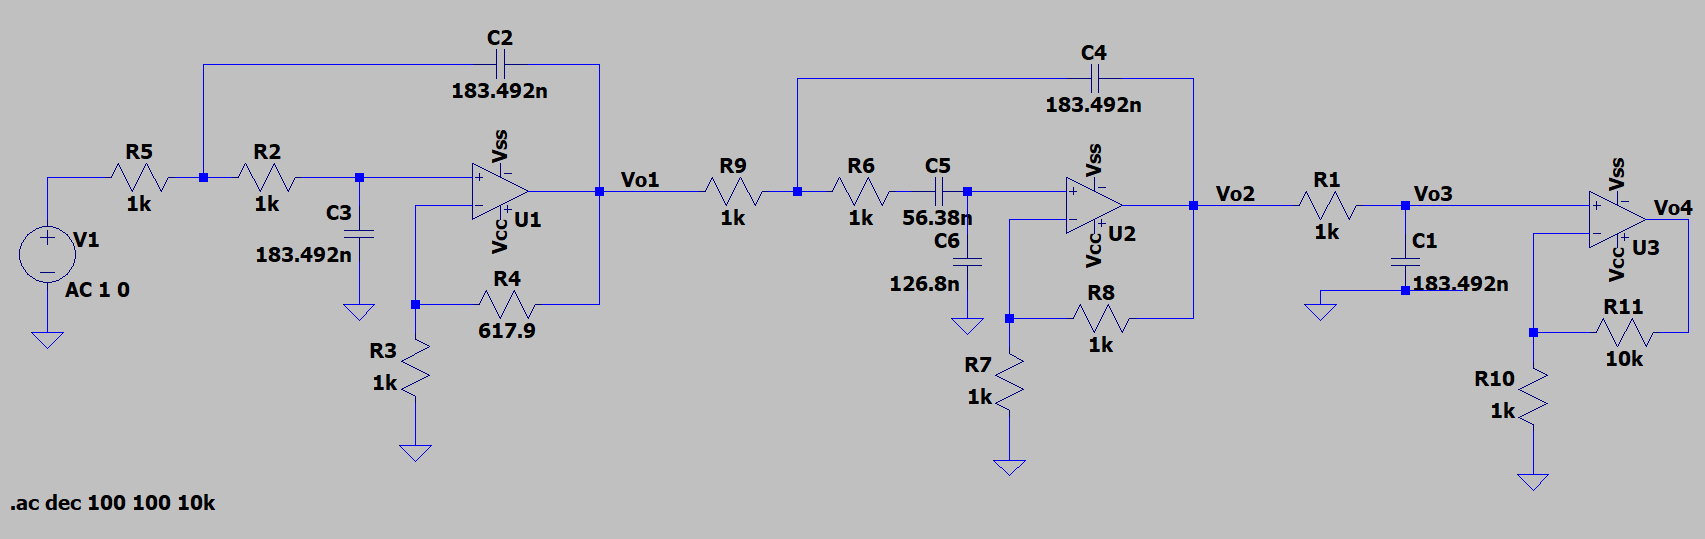
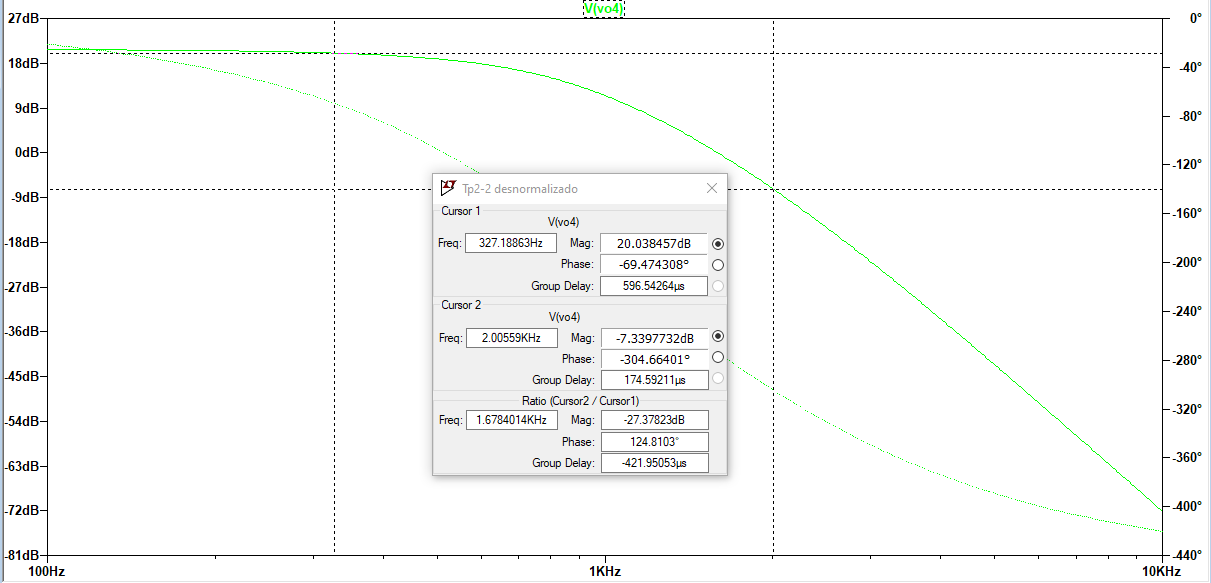

# Ejercicio N3

Un filtro pasabajos Chebyshev se diseña para obtener una atenuación de 48 dB para frecuencias mayores a 9.6 KHz, con una atenuación máxima de 0.4 dB desde continua hasta 3.2 kHz.
- Determinar el orden del filtro y el parámetro ɛ.
- Graficar la respuesta en módulo del filtro.
- Determinar la ubicación de polos y ceros.
- Sintetizar el circuito utilizando estructuras Kerwin–Huelsman–Newcomb y simular verificando las condiciones de diseño.

In [7]:
import numpy as np

f1 = 3200
f2 = 9600
norma_w = f1

f1 = f1/norma_w
f2 = f2/norma_w

alfa_min = 48
alfa_max = 0.4

epsilon_2 = 10**(alfa_max/10)-1
epsilon = np.sqrt(epsilon_2)
n = np.ceil(np.arccosh((np.sqrt(np.power(10, alfa_min * 0.1)) - 1) / epsilon_2) / (np.arccosh(f2)))

print('Epsilon: {:.4f}'.format(epsilon))
print('Epsilon al cuadrado: {:.4f}'.format(epsilon_2))
print('Orden del filtro: {:0.0f}'.format(n))

Epsilon: 0.3106
Epsilon al cuadrado: 0.0965
Orden del filtro: 5


Para orden 5, el polinomio de Chebyshev es:
$$ C_5(w)= 16w^5-20w^3+5w $$
La transferencia del filtro queda entonces:
$$ \lvert T(jw)\rvert^2=\frac{1}{1+\varepsilon^2(16w^5-20w^3+5w)^2}$$

$$ \lvert T(jw)\rvert^2=\frac{1}{256\varepsilon^2w^{10}-640\varepsilon^2w^8+560\varepsilon^2w^6-200\varepsilon^2w^4+25\varepsilon^2w^2+1}$$

Haciendo el reemplazo: $T(s).T(-s)=\lvert T(jw)\rvert^2\rfloor_{w=\frac{s}{j}}$

$$ T(s).T(-s)=\frac{1}{-256\varepsilon^2s^{10}-640\varepsilon^2s^8-560\varepsilon^2s^6-200\varepsilon^2s^4-25\varepsilon^2s^2+1}$$

$$ T(s).T(-s)=\frac{-\frac{1}{256\varepsilon^2}}{s^{10}+2,5s^8+2,1875s^6+0,78125s^4+0,0976s^2-\frac{1}{256\varepsilon^2}}$$

A continuación, grafico la transferencia y la ubicación de los polos y ceros:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

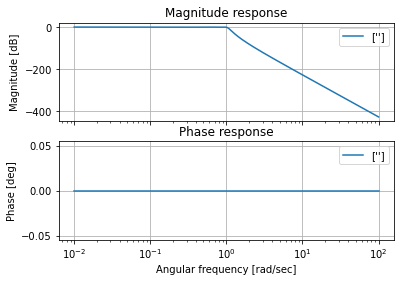

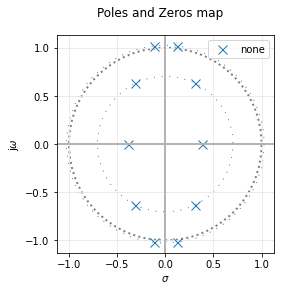

In [8]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt


my_tf = TransferFunction( [-1/(256*epsilon_2)], [1, 0, 2.5, 0, 2.1875, 0, 0.78125, 0, 0.0976, 0, (-1)/(256*epsilon_2)] )

bodePlot(my_tf)

pzmap(my_tf)

Para sintetizar el circuito en Secciones de Segundo Orden, debo redefinir la transferencia. Para esto, obtengo sus polos:

In [9]:
pol = [1, 0, 2.5, 0, 2.1875, 0, 0.78125, 0, 0.0976, 0, (-1)/(256*epsilon_2)]
np.set_printoptions(precision=3)
print(np.roots(pol))
# ACA CORREGIR LAS TRABSFERENCIAS T(S)

[ 0.119+1.019j  0.119-1.019j -0.119+1.019j -0.119-1.019j  0.312+0.63j
  0.312-0.63j  -0.312+0.63j  -0.312-0.63j  -0.386+0.j     0.386+0.j   ]


Me quedo con las raíces correspondientes a $T(s)$

$$ T(s)=\frac{1,0525}{s^2+0,2385.s+1,0525}\frac{0,4942}{s^2+0,6247.s+0,4942}\frac{0,20156.0,3861}{s+0,3861}$$

Los parámetros de las transferencias son:

In [10]:
wo1_2 = 1.0525
wo1_q = 0.2385

wo1 = np.sqrt(wo1_2)
q1 = wo1/wo1_q
k1 = (wo1/q1)/(wo1_q)

print('Parametros del 1er filtro:')
print('Wo1={:.4f} - Q1={:.4f} - k1={:.4f}'.format(wo1, q1, k1))

Parametros del 1er filtro:
Wo1=1.0259 - Q1=4.3015 - k1=1.0000


In [11]:
wo2_2 = 0.4942
wo2_q = 0.6247

wo2 = np.sqrt(wo2_2)
q2 = wo2/wo2_q
k2 = (wo2/q2)/(wo2_q)

print('Parametros del 2do filtro:')
print('Wo2={:.4f} - Q2={:.4f} - k2={:.4f}'.format(wo2, q2, k2))

Parametros del 2do filtro:
Wo2=0.7030 - Q2=1.1253 - k2=1.0000


In [12]:
wc3 = 0.3861
k3 = 0.20156

print('Parametros del 3er filtro:')
print('Wc3={:.4f} - k3={:.4f}'.format(wc3, k3))

Parametros del 3er filtro:
Wc3=0.3861 - k3=0.2016


Diseñamos los filtros de acuerdo a las condiciones de diseño establecidas en el siguiente documento:

In [14]:
from IPython.display import IFrame
IFrame("./pdf/MT-223.pdf", width=1000, height=500)

In [15]:
r1_1 = 10e3

alp = k1
ahp = 1

r2_1 = alp*r1_1
r3_1 = ahp*r1_1

c_1 = 1e-6
r_1 = (1/(2*np.pi*norma_w*wo1*c_1))*np.sqrt(ahp/alp)

r7_1 = 10e3
#r6_1 = np.sqrt(r2_1*r3_1)*q1*(1/((1/r1_1)*(1/r2_1)*(1/r3_1)))
r6_1 = (q1*r1_1*r7_1*((1/r1_1)+(1/r2_1)+(1/r3_1)))-r7_1

print('Para el primer filtro los valores de los componentes son:')
print('R1={:.2e} ohm - R2={:.2e} ohm - R3={:.2e} ohm - R4={:.2e} ohm'.format(r1_1, r2_1, r3_1, r_1))
print('R5={:.2e} ohm - R6={:.2e} ohm - R7={:.2e} ohm'.format(r_1, r6_1, r7_1))
print('C1={:.2e} F - C2={:.2e} F'.format(c_1, c_1))

Para el primer filtro los valores de los componentes son:
R1=1.00e+04 ohm - R2=1.00e+04 ohm - R3=1.00e+04 ohm - R4=4.85e+01 ohm
R5=4.85e+01 ohm - R6=1.19e+05 ohm - R7=1.00e+04 ohm
C1=1.00e-06 F - C2=1.00e-06 F


In [16]:
r1_2 = 10e3

alp_2 = k2
ahp_2 = 1

r2_2 = alp*r1_2
r3_2 = ahp*r1_2

c_2 = 1e-6
r_2 = (1/(2*np.pi*norma_w*wo2*c_2))*np.sqrt(ahp_2/alp_2)

r7_2 = 10e3
#r6_1 = np.sqrt(r2_1*r3_1)*q1*(1/((1/r1_1)*(1/r2_1)*(1/r3_1)))
r6_2 = (q2*r1_2*r7_2*((1/r1_2)+(1/r2_2)+(1/r3_2)))-r7_2

print('Para el segundo filtro los valores de los componentes son:')
print('R1={:.2e} ohm - R2={:.2e} ohm - R3={:.2e} ohm - R4={:.2e} ohm'.format(r1_2, r2_2, r3_2, r_2))
print('R5={:.2e} ohm - R6={:.2e} ohm - R7={:.2e} ohm'.format(r_2, r6_2, r7_2))
print('C1={:.2e} F - C2={:.2e} F'.format(c_2, c_2))

Para el segundo filtro los valores de los componentes son:
R1=1.00e+04 ohm - R2=1.00e+04 ohm - R3=1.00e+04 ohm - R4=7.07e+01 ohm
R5=7.07e+01 ohm - R6=2.38e+04 ohm - R7=1.00e+04 ohm
C1=1.00e-06 F - C2=1.00e-06 F


In [17]:
c_3 = 1e-6
r_3 = 1/(2*np.pi*norma_w*wc3*c_3)

print('Para el tercer filtro los valores de los componentes son:')
print('R={:.2e} ohm - C={:.2e} F'.format(r_3, c_3))

Para el tercer filtro los valores de los componentes son:
R=1.29e+02 ohm - C=1.00e-06 F


Con todos los componentes calculados, realizamos la simulación en LTSpice:

<div>
<img src="img/circuito.PNG" alt="Drawing" style="width: 800px;"/>
</div>

A lo cual se obtuvieron los siguientes resultados:

<div>
<img src="img/simulacion.PNG" alt="Drawing" style="width: 800px;"/>
</div>
<!--  -->
Se puede observar que se cumple con las especificaciones del enunciado

# Ejercicio N4
A partir de la siguiente plantilla, sabiendo que:

  


| ⍺máx [dB] | ⍺mín [dB] | fp [Hz] | fs [Hz] |
| --------- | --------- | ------- | ------- |
| 1 | 35 | 3500 | 1000 |



1) Obtener polos y ceros para máxima planicidad en la banda de paso.

2) Implementar el circuito con estructuras pasivas adaptadas mediante buffers.

3) Utilizando una norma de impedancia ZN = 1K, obtenga el valor de los componentes.

4) Active las bobinas utilizando una estructura con OPAMPs.

### Obtener polos y ceros para máxima planicidad en la banda de paso.

$ W_p = 1 $   
$ W_s = \frac{W_s'}{W_p'} = \frac{1000 Hz}{3500 Hz} = 0,2857 $  
$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot w^(2n)} $   
$ |T(jw)|^2 |w=1 = \frac{1}{1 + \epsilon^2} = \frac{1}{\alpha^2_m}$  
$ \alpha$<sub>max</sub> $=  \sqrt{1 + \epsilon^2}$   
$ \alpha$<sub>max-dB</sub> $=  10 \cdot log(1 + \epsilon^2) $     
$ \epsilon = \sqrt{10^{\frac{\alpha_mdB}{10}} - 1} $  
$ \epsilon = \sqrt{10^{\frac{1}{10}} - 1} $   
$ \epsilon = 0,5088 $  

### Obtener la transferencia como pasabajos.

$ W_{sPB} = \frac{1}{W_s} = 3,5 $  
$ \alpha_{mindB} = 10 \cdot log(1 + \epsilon^2 \cdot W_{sPB}^{2n}) $  
$ n = 4 -> \alpha = 37,67 dB $  
$ |T(jw))|^2 |w=\frac{s}{j} = \frac{1}{1 + \epsilon^2 \cdot s^(2 \cdot 4)} = T(s) \cdot T(-s) $  

#### Diseño como butter
$ \Omega_{W} = W_B = \epsilon^{\frac{-1}{n}} \cdot W_p' = \epsilon^{\frac{-1}{4}} \cdot 2 \pi \cdot 3500 Hz $  
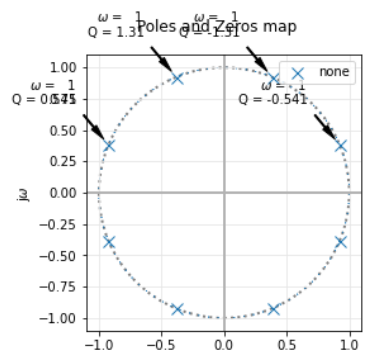
Lo divido en 2 filtros de orden 2:  
$ Q_1 = \frac{1}{2 \cdot cos(\frac{\pi}{8})} = 0,5412 $  
$ Q_2 = \frac{1}{2 \cdot cos(\frac{3\pi}{8})} = 1,306 $   
$ T_1(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_1} + W_0^2} $  
$ T_2(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_2} + W_0^2} $  
$ L_1 = Q_1   L_2 = Q_2  C_1 = \frac{1}{Q_1}  C_2 = \frac{1}{Q_2} $

### Circuito normalizado
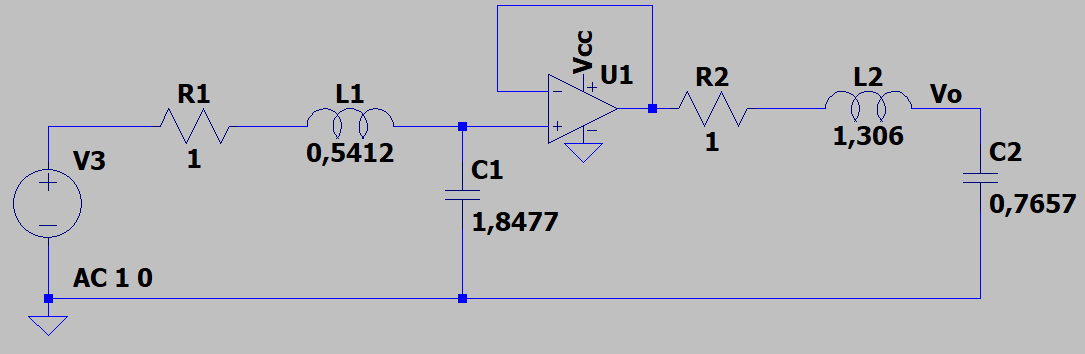

## Transformación circuital a pasa altos
$ Z_L = p \cdot L = \frac{L}{s} = \frac{1}{C_{eq} \cdot s} $  
$ Z_C = \frac{1}{p \cdot C} = \frac{s}{C} = L_{eq} \cdot s $  

$ C_{eq1} = \frac{1}{L_1} = 1,8477 $  
$ C_{eq2} = \frac{1}{L_2} = 0,7657 $  
$ L_{eq1} = \frac{1}{C_1} = 0,5412 $  
$ L_{eq2} = \frac{1}{C_2} = 1,306 $  

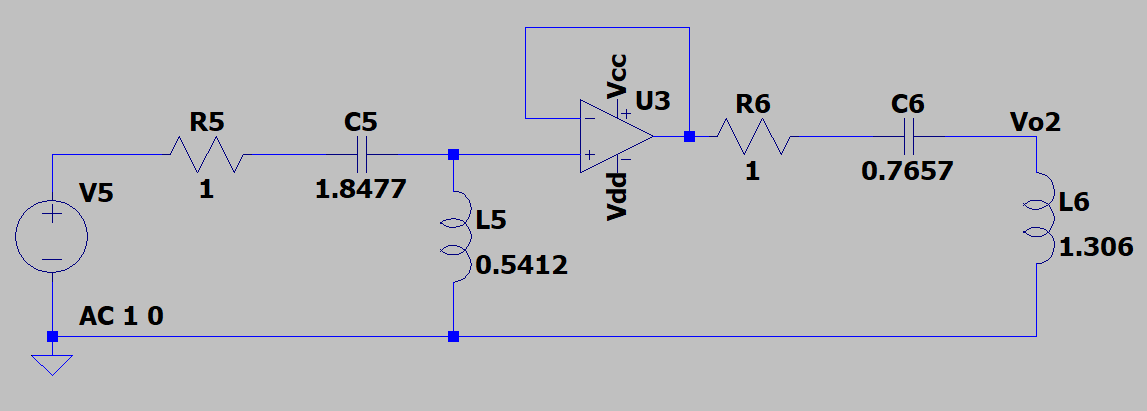

#### Desnormalizar:  
Como estoy en pasa-altos cuando desnormalice el $\Omega_W$ tengo que usar $\epsilon^{\frac{1}{n}}$  
$ R^D = R \cdot \Omega_Z = 1 \cdot 1k = 1k $  
$ L^D = \frac{L \cdot \Omega_Z}{\Omega_W} $  
$ L^D_1 = \frac{Q_1 \cdot 1k}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_1 = \frac{0,5412 \cdot 1k}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_1 = 29,14 mHy $  
$ L^D_2 = \frac{Q_2 \cdot 1k}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_2= \frac{1,306 \cdot 1k}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_2 = 70,32 mHy $  
$ C^D = \frac{C}{\Omega_W \cdot \Omega_Z} $  
$ C^D_1 = \frac{1}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot Q_1} $  
$ C^D_1 = \frac{1}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot 0,5412} $  
$ C^D_1 = 99,5 nF $
$ C^D_2 = \frac{1}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot Q_2} $  
$ C^D_2 = \frac{1}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot 1,306} $  
$ C^D_2 = 41,23 nF $  

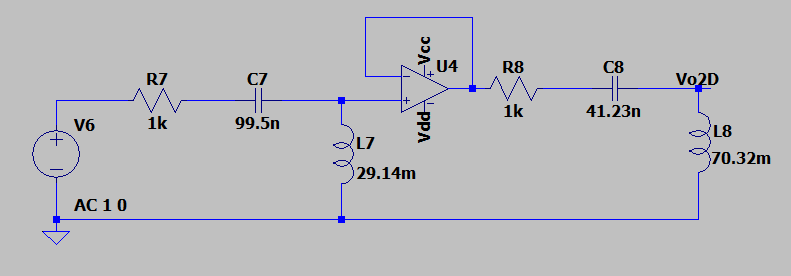
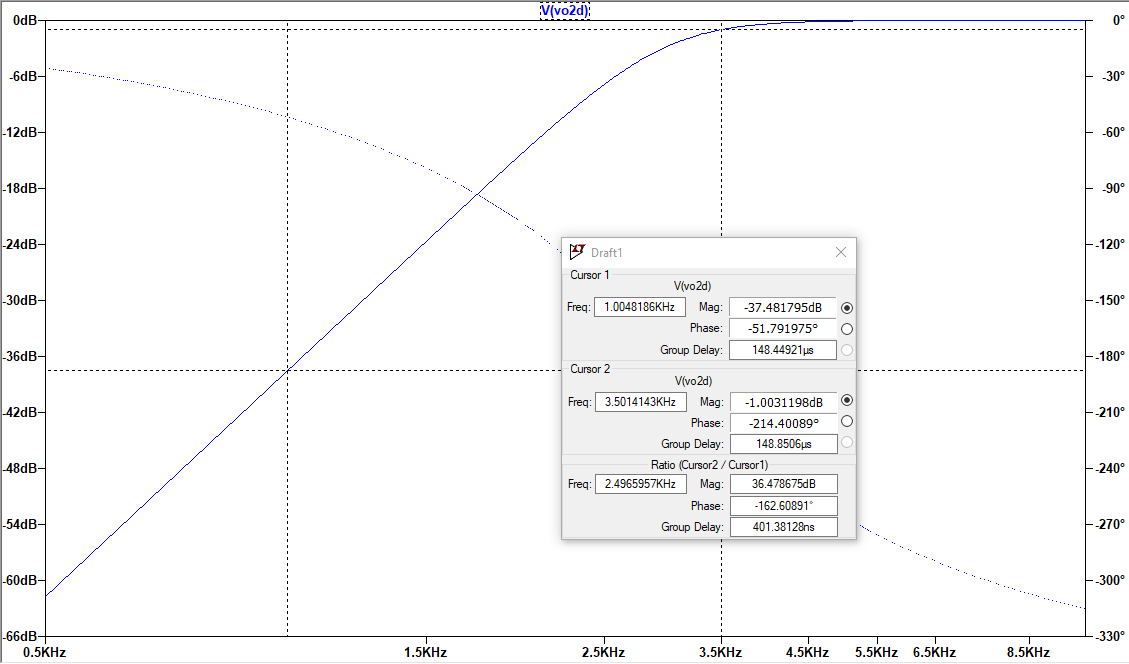

## Activar los inductores con OPAMPS
Como ambos inductores estan referidos a masa, puedo resolverlo utilizando unicamente 2 OPAMPS por inductor de forma tal que:
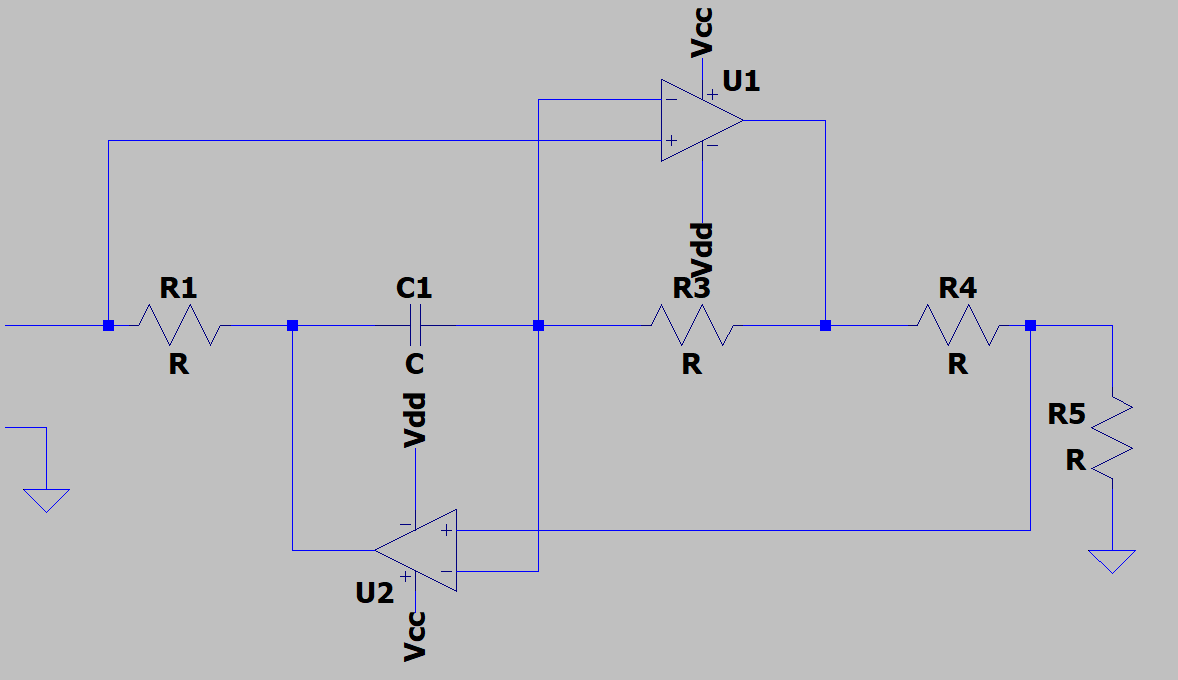
$ L^D_1 = 29,14 mHy $  
$ L^D_1 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_1 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 1k $  
$ C = 29,14 nF $  
$ L^D_2 = 70,32 mHy $  
$ L^D_2 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_2 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 1k $  
$ C = 70,32 nF $

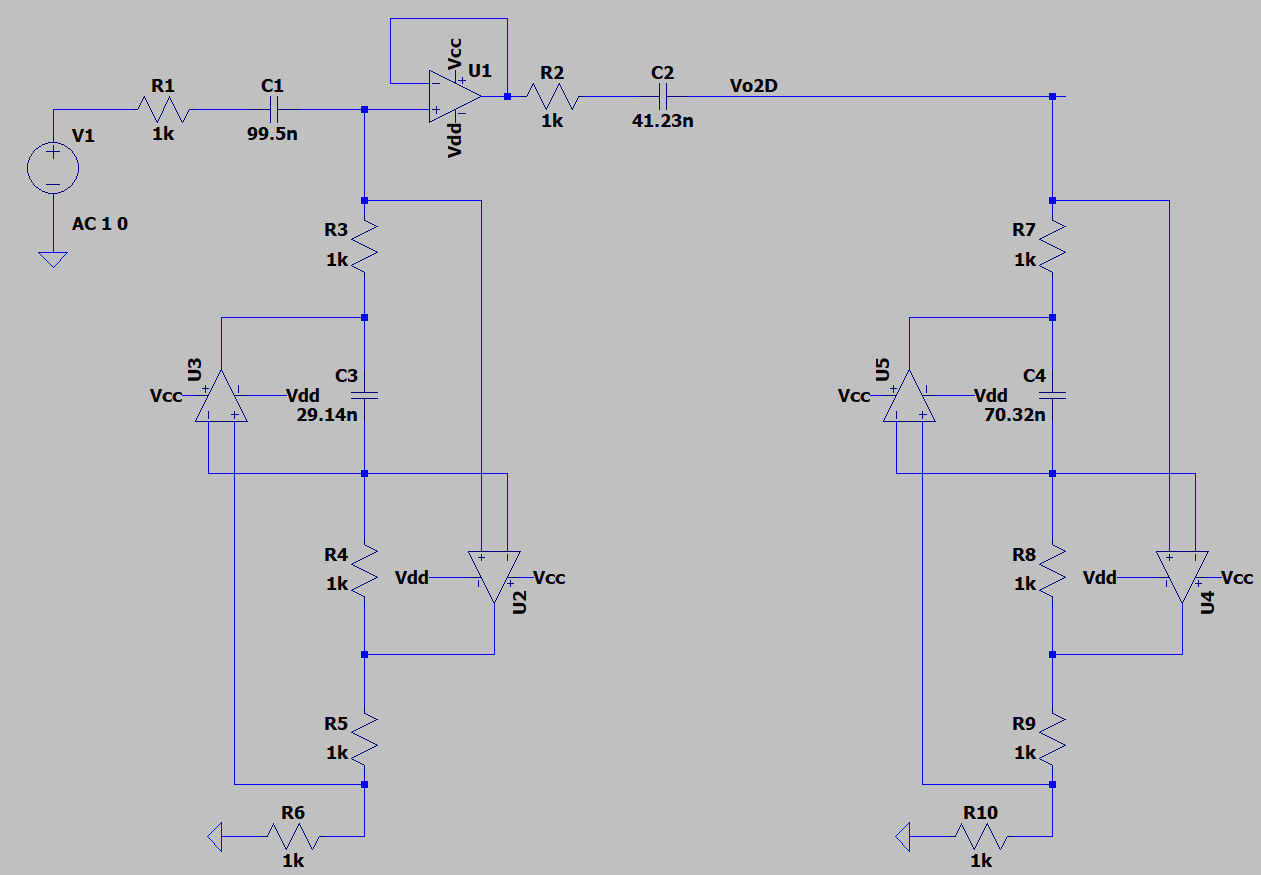
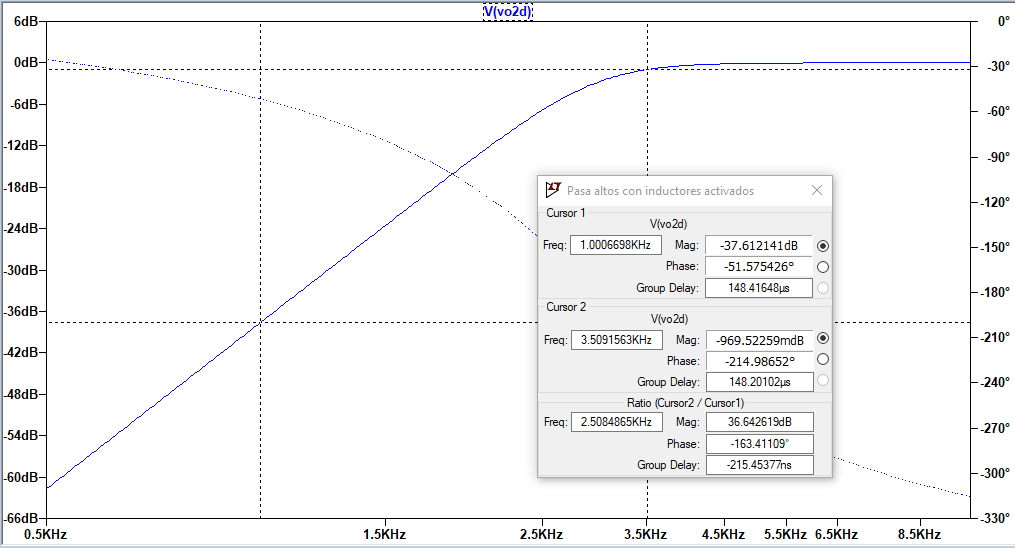

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

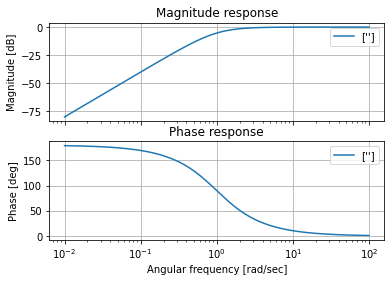

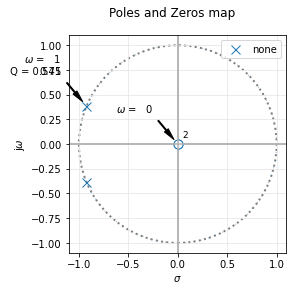

In [18]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

w01 = 1
Q1 = 0.5412

numerador1 = [1,0,0]
denominador1 = [1,w01/Q1,w01**2]

my_tf1 = TransferFunction(numerador1, denominador1)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

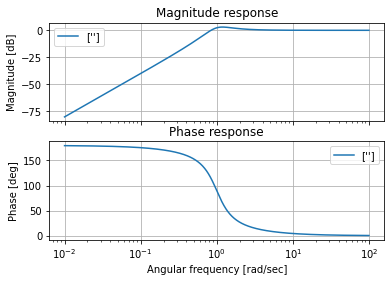

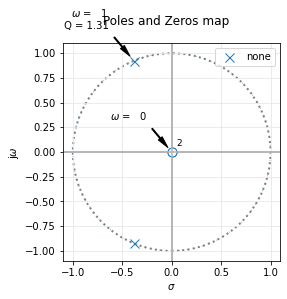

In [19]:
w02 = 1
Q2 = 1.306

numerador2 = [1,0,0]
denominador2 = [1,w02/Q2,w02**2]

my_tf2 = TransferFunction(numerador2, denominador2)

bodePlot(my_tf2,1)

pzmap(my_tf2,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

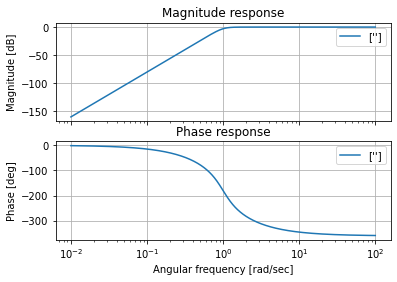

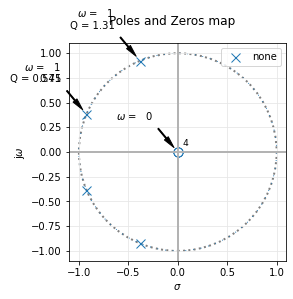

In [20]:
numerador3 = np.polymul(numerador1,numerador2)
denominador3 = np.polymul(denominador1,denominador2)

my_tf = TransferFunction(numerador3, denominador3)

bodePlot(my_tf,1)

pzmap(my_tf,2)

# Ejercicio N5
<img src="img/ej5.png">

Para satisfacer esta plantilla debemos realizar un filtro pasa-altos. Para que tenga el menor orden posible debe ser de tipo Chebyshev.
Noramlizamos en frecuencia:

In [21]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import math as m

w_p = 9600*2*pi
w_s = 3200*2*pi

w_p_n = w_p / w_p
w_s_n = w_s / w_p

print("wpn = ", w_p_n)
print("wsn = ", w_s_n)

wpn =  1
wsn =  1/3


Y ahora realizamos la transformacion de pasa-altos a pasabajos:

In [22]:
Omega_p = 1 / w_p_n
Omega_s = 1 / w_s_n

print("Omega_p = ", Omega_p)
print("Omega_s = ", Omega_s)

w_s_lp = abs(Omega_s)

alpha_max = 0.4    # dB
alpha_min = 48   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh(sqrt(m.pow(10, alpha_min * 0.1) - 1) / epsilon) / (m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')

Omega_p =  1
Omega_s =  3
epsilon: 0.3106093948083108, N: 5


In [23]:
w,T=symbols("w,T")
T = 1/(1+(epsilon**2)*(16*w**5 - 20*w**3 +5*w)**2)


num, den = fraction(simplify(expand(T)))  #simplificamos y separamos numerador y denominador

display(T)

num = Poly(num,s)
den = Poly(den,s)

T = num/den
display(T)

1/(0.0964781961431851*(16*w**5 - 20*w**3 + 5*w)**2 + 1)

1/(24.6984182126554*w**10 - 61.7460455316385*w**8 + 54.0277898401837*w**6 - 19.295639228637*w**4 + 2.41195490357963*w**2 + 1.0)

In [24]:
coeffs_den = [-24.6984182126554,0,-61.7460455316385,0,-54.0277898401837,0,-19.295639228637,0,-2.41195490357963,0,1]
polos = np.roots(coeffs_den)
polost = []


for polo in polos:
    if (polo.real <0):
        polost.append(polo.round(2))
        
print("polos:",polost)

polos: [(-0.12+1.02j), (-0.12-1.02j), (-0.31+0.63j), (-0.31-0.63j), (-0.39+0j)]


In [25]:
wo_1 = abs(polost[0])
print("wo1 =",wo_1)

wo_2 = abs(polost[2])
print("wo2 =",wo_2)

wo_3 = abs(polost[4])
print("wo3 =",wo_3)

q1 = 1/(2*cos(atan(polost[0].imag/polost[0].real)))
print("Q1 =",q1)
q2 = 1/(2*cos(atan(polost[2].imag/polost[2].real)))
print("Q2 =",q2)
q3 = 1/(2*cos(atan(polost[4].imag/polost[4].real)))
print("Q3 =",q3)

wo1 = 1.0270345661174214
wo2 = 0.7021395872616784
wo3 = 0.39
Q1 = 4.27931069215592
Q2 = 1.13248320526077
Q3 = 1/2


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

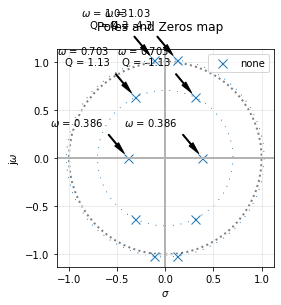

In [26]:
my_tf = TransferFunction( [1], coeffs_den )

pzmap(my_tf, 10) #S plane pole/zero plot

In [27]:
T1,T2,T3 = symbols("T1,T2,T3")

T1 = (1/abs((coeffs_den[0])))/(s + wo_3) #en el numerador debemos poner una constante que representa al coeff del s**10
display(T1)
T2 = wo_2**2/(s**2 + s*(wo_2/q2) + wo_2**2)
display(T2)
T3 = wo_1**2/(s**2 + s*(wo_1/q1) + wo_1**2)
display(T3)

0.0404884228370383/(s + 0.39)

0.493/(s**2 + 0.62*s + 0.493)

1.0548/(s**2 + 0.24*s + 1.0548)

Esto puede ser implementado con dos filtros pasa-altos de 2° orden, y unos de 1° orden.

In [28]:
T1_pa = T1.subs(s, 1/s)
T2_pa = T2.subs(s, 1/s)
T3_pa = T3.subs(s, 1/s)

T1_pa = simplify(expand(T1_pa))
T2_pa = simplify(expand(T2_pa))
T3_pa = simplify(expand(T3_pa))

display(T1_pa)
display(T2_pa)
display(T3_pa)

0.0404884228370383*s/(0.39*s + 1)

0.493*s**2/(0.493*s**2 + 0.62*s + 1)

1.0548*s**2/(1.0548*s**2 + 0.24*s + 1)

In [29]:
T1_pa = T1_pa.subs(s, s/w_p)
T2_pa = T2_pa.subs(s, s/w_p)
T3_pa = T3_pa.subs(s, s/w_p)

T1_pa = simplify(expand(T1_pa))
T2_pa = simplify(expand(T2_pa))
T3_pa = simplify(expand(T3_pa))

display(T1_pa)
display(T2_pa)
display(T3_pa)

2.10877202276241e-6*s/(2.03125e-5*s + pi)

1.33734809027778e-9*s**2/(1.33734809027778e-9*s**2 + 3.22916666666667e-5*pi*s + pi**2)

2.861328125e-9*s**2/(2.861328125e-9*s**2 + 1.25e-5*pi*s + pi**2)

In [30]:
num3, den3 = fraction(simplify(expand(T3_pa)))  #simplificamos y separamos numerador y denominador
num2, den2 = fraction(simplify(expand(T2_pa)))  #simplificamos y separamos numerador y denominador

num3 = Poly(num3,s)
den3 = Poly(den3,s)
num2 = Poly(num2,s)
den2 = Poly(den2,s)

num2 = num2.monic() #hacemos que el numerador y denominador sean monicos
den2 = den2.monic()
num3 = num3.monic() #hacemos que el numerador y denominador sean monicos
den3 = den3.monic()

T2_pa = num2/den2
T3_pa = num3/den3

display(T2_pa)
display(T3_pa)

1.0*s**2/(1.0*s**2 + 24146.0446247464*pi*s + 747748478.701825*pi**2)

1.0*s**2/(1.0*s**2 + 4368.60068259385*pi*s + 349488054.607509*pi**2)

# Ejercicio N6
Diseñar un filtro pasabajos a partir de una estructura MFB sabiendo que debe proporcionar un retardo constante de 100 µs en la banda de paso, con un desvío del retardo máximo de 10% para la frecuencia de ⍵1=25k rad/s y un máximo de 1  dB de atenuación a la frecuencia de ⍵2= 10k rad/s

Para comenzar, se normaliza la plantilla:

In [31]:
w1 = 25e3
w2 = 10e3
T = 100e-6

norma_w = 1/T

w1 = w1/norma_w
w2 = w2/norma_w

print('Frecuencias normalizadas: W1={:0.1f}, W2={:0.0f}'.format(w1, w2))

Frecuencias normalizadas: W1=2.5, W2=1


Con estos valores, se deben revisar los gráficos de Bessel:

<div>
<img src="img/bessel1.PNG" alt="Drawing" style="width: 800px;"/>
</div>

<div>
<img src="img/bessel2.PNG" alt="Drawing" style="width: 400px;"/>
</div>

<div>
<img src="img/bessel3.PNG" alt="Drawing" style="width: 400px;"/>
</div>

El 10% de desviación se satisface con $n=4$, mientras que la atenuación de 1dB se logra con $n=3$. Para lograr satisfacer ambos requisitos, se opta por trabajar con $n=4$.

La transferencia de un filtro Bessel de orden 4 se corresponde con la siguiente expresión:

$$ H(s)=\frac{105}{s^4+10s^3+45s^2+105s+105}=\frac{9,14}{s^2+5,79s+9,14}.\frac{11,49}{s^2+4,21s+11,49} $$

Para sintetizar el circuito, se debe utilizar la estructura MFB. Todas las características relacionadas con esta topología se pueden encontrar en el siguiente documento:

In [33]:
from IPython.display import IFrame
IFrame("./pdf/mt-220.pdf", width=1000, height=500)

El documento define a la transferencia como:

$$ \frac{-Hw_o^2}{s^2+aw_os+w_o^2} $$

A continuación se diseñan las secciones de segundo orden:

In [34]:
import numpy as np

wo1_2 = 9.14
a_1 = 5.79/np.sqrt(wo1_2)
H_1 = 9.14/(2*np.sqrt(wo1_2))

c5_1 = 1e-9
k_1 = 2*np.pi*np.sqrt(wo1_2)*norma_w*c5_1
c2_1 = (2/a_1)*(H_1+1)*c5_1
r1_1 = a_1/(2*H_1*k_1)
r3_1 = a_1/(2*(H_1+1)*k_1)
r4_1 = a_1/(2*k_1)

print('Componentes del primer filtro:')
print('R1={:.3e} ohm - R3={:.3e} ohm - R4={:.3e} ohm'.format(r1_1, r3_1, r4_1))
print('C2={:.2e} F - C5={:.2e} F'.format(c2_1, c5_1))

Componentes del primer filtro:
R1=3.335e+03 ohm - R3=2.007e+03 ohm - R4=5.041e+03 ohm
C2=2.62e-09 F - C5=1.00e-09 F


In [35]:
wo2_2 = 11.49
a_2 = 4.21/np.sqrt(wo2_2)
H_2 = 11.49/(2*np.sqrt(wo2_2))

c5_2 = 1e-9
k_2 = 2*np.pi*np.sqrt(wo2_2)*norma_w*c5_2
c2_2 = (2/a_2)*(H_2+1)*c5_2
r1_2 = a_2/(2*H_2*k_2)
r3_2 = a_2/(2*(H_2+1)*k_2)
r4_2 = a_2/(2*k_2)

print('Componentes del segundo filtro:')
print('R1={:.3e} ohm - R3={:.3e} ohm - R4={:.3e} ohm'.format(r1_2, r3_2, r4_2))
print('C2={:.2e} F - C5={:.2e} F'.format(c2_2, c5_2))

Componentes del segundo filtro:
R1=1.720e+03 ohm - R3=1.082e+03 ohm - R4=2.916e+03 ohm
C2=4.34e-09 F - C5=1.00e-09 F


Teniendo los valores de los componentes, se realizó la simulación del circuito en LTSpice:

<div>
<img src="img/circuito6.PNG" alt="Drawing" style="width: 800px;"/>
</div>

A lo que se obtuvo la siguiente transferencia:

<div>
<img src="img/simulacion6.PNG" alt="Drawing" style="width: 800px;"/>
</div>

Se obtiene una ganancia de 8dB en bajas frecuencias, pero por el momento no se pudo determinar el motivo.

# Ejercicio N8

In [36]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import math as m

w_p = 45000*2*pi
w_s = 12000*2*pi

w_p_n = w_p / w_p
w_s_n = w_s / w_p

Omega_p = 1 / w_p_n
Omega_s = 1 / w_s_n

w_s_lp = abs(Omega_s)

alpha_max = 1    # dB
alpha_min = 54   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh(sqrt(m.pow(10, alpha_min * 0.1) - 1) / epsilon) / (m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')

epsilon: 0.5088471399095875, N: 4


In [37]:
w,T=symbols("w,T")
T = 1/(1+(0.259)*(8*w**4 - 8*w**2 +1)**2)


num, den = fraction(simplify(expand(T)))  #simplificamos y separamos numerador y denominador

display(T)

num = Poly(num,s)
den = Poly(den,s)

T = num/den
display(T)

1/(0.259*(8*w**4 - 8*w**2 + 1)**2 + 1)

1/(16.576*w**8 - 33.152*w**6 + 20.72*w**4 - 4.144*w**2 + 1.259)

array([-0.14 +0.983j, -0.14 -0.983j,  0.14 +0.983j,  0.14 -0.983j,
       -0.337+0.407j, -0.337-0.407j,  0.337+0.407j,  0.337-0.407j])

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

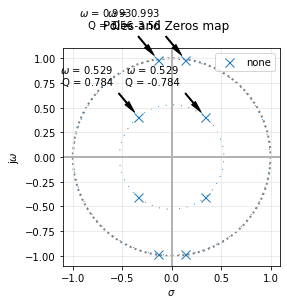

In [38]:
coeffs_den = [16.576,0,33.152,0,20.72,0,4.144,0,1.26]#aca ya estoy en s, por eso cambian los signos de los coeficientes

root = np.roots(coeffs_den)

display(root)

my_tf = TransferFunction( [1], coeffs_den )

pzmap(my_tf, 8) #S plane pole/zero plot

In [39]:
polos = np.roots(coeffs_den)
polost = []


for polo in polos:
    if (polo.real <0):
        polost.append(polo.round(2))
        
print("polos:",polost)        

polos: [(-0.14+0.98j), (-0.14-0.98j), (-0.34+0.41j), (-0.34-0.41j)]


In [40]:
wo_1 = abs(polost[0])
print("wo1 =",wo_1)

wo_2 = abs(polost[2])
print("wo2 =",wo_2)


q1 = 1/(2*cos(atan(polost[0].imag/polost[0].real)))
print("Q1 =",q1)
q2 = 1/(2*cos(atan(polost[2].imag/polost[2].real)))
print("Q2 =",q2)

wo1 = 0.9899494936611665
wo2 = 0.532634959423431
Q1 = 3.53553390593274
Q2 = 0.783286705034457


In [41]:
T1,T2 = symbols("T1,T2")

T1 = wo_1**2/(s**2 + s*(wo_1/q1) + wo_1**2)
display(T1)
T2 = wo_2**2/(s**2 + s*(wo_2/q2) + wo_2**2)
display(T2)

0.98/(s**2 + 0.28*s + 0.98)

0.2837/(s**2 + 0.68*s + 0.2837)

In [42]:
T1 = T1.subs(s, 1/s)
T2 = T2.subs(s, 1/s)
T1 = simplify(expand(T1))
T2 = simplify(expand(T2))
display(T1)
display(T2)

0.98*s**2/(0.98*s**2 + 0.28*s + 1)

0.2837*s**2/(0.2837*s**2 + 0.68*s + 1)

In [43]:
T1 = T1.subs(s, s/w_p)
T2 = T2.subs(s, s/w_p)
T1 = simplify(expand(T1))
T2 = simplify(expand(T2))
display(T1)
display(T2)

1.20987654320988e-10*s**2/(1.20987654320988e-10*s**2 + 3.11111111111111e-6*pi*s + pi**2)

3.50246913580247e-11*s**2/(3.50246913580247e-11*s**2 + 7.55555555555556e-6*pi*s + pi**2)

In [44]:
num1, den1 = fraction(simplify(expand(T1)))  #simplificamos y separamos numerador y denominador
num2, den2 = fraction(simplify(expand(T2)))  #simplificamos y separamos numerador y denominador

num1 = Poly(num1,s)
den1 = Poly(den1,s)
num2 = Poly(num2,s)
den2 = Poly(den2,s)

num1 = num1.monic() #hacemos que el numerador y denominador sean monicos
den1 = den1.monic()
num2 = num2.monic() #hacemos que el numerador y denominador sean monicos
den2 = den2.monic()

T1 = num1/den1
T2 = num2/den2

display(T1)
display(T2)

1.0*s**2/(1.0*s**2 + 25714.2857142857*pi*s + 8265306122.44898*pi**2)

1.0*s**2/(1.0*s**2 + 215720.831864646*pi*s + 28551286570.3208*pi**2)

Para implementar este circuito usaremos la siguiente estructura:
    
<img src="img/Estructura_OTA.png">

Su transferencia es:

<img src="img/transf_OTA.png">


En este caso, como necesitamos el $s^{2}$ en el numerador, conectamos $V_A$ y $V_B$ a masa y asi la transferencia nos queda:

$
{\Large \frac{V_{o1}}{V_C} = \frac{s^{2}C_1 C_2}{s^{2}C_1 C_2 + sC_1 g_{m2} + g_{m1}g_{m2}}}$

Operando llegamos a los siguientes valores:

C1 = C2 = 11uF , C3 = C4 = 5.91uF, Gm1=11.11 S, Gm2=0.8882 S, Gm3=2.4575 S, Gm4=4.016 S

Finalmente simulamos:

<img src="img/simulacion_desn.png">

Se puede ver que los requisitos de la plantilla fueron cumplidos.